In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define paths
train_path = '/content/drive/MyDrive/final_project_data/training'
valid_path = '/content/drive/MyDrive/final_project_data/validation'
test_path = '/content/drive/MyDrive/final_project_data/test'


In [4]:
# Set image size and batch size
img_size = (150, 150)
batch_size = 32

In [5]:
# Create data generators for all 3 sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 3500 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=valid_generator)

Epoch 1/50
110/110 [==============================] - 1256s 11s/step - loss: 1.6786 - accuracy: 0.3166 - val_loss: 1.3621 - val_accuracy: 0.4300
Epoch 2/50
110/110 [==============================] - 249s 2s/step - loss: 1.3294 - accuracy: 0.4589 - val_loss: 1.1754 - val_accuracy: 0.5270
Epoch 3/50
110/110 [==============================] - 249s 2s/step - loss: 1.1754 - accuracy: 0.5280 - val_loss: 1.1000 - val_accuracy: 0.5760
Epoch 4/50
110/110 [==============================] - 257s 2s/step - loss: 1.0669 - accuracy: 0.5823 - val_loss: 1.0390 - val_accuracy: 0.5860
Epoch 5/50
110/110 [==============================] - 251s 2s/step - loss: 1.0460 - accuracy: 0.5934 - val_loss: 1.0206 - val_accuracy: 0.6030
Epoch 6/50
110/110 [==============================] - 253s 2s/step - loss: 0.9598 - accuracy: 0.6177 - val_loss: 1.0194 - val_accuracy: 0.6050
Epoch 7/50
110/110 [==============================] - 250s 2s/step - loss: 0.8678 - accuracy: 0.6706 - val_loss: 1.0623 - val_accuracy: 0.61

In [11]:
model.evaluate(test_generator, verbose=2)

16/16 - 10s - loss: 2.4871 - accuracy: 0.6320 - 10s/epoch - 649ms/step


[2.4870808124542236, 0.6320000290870667]

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

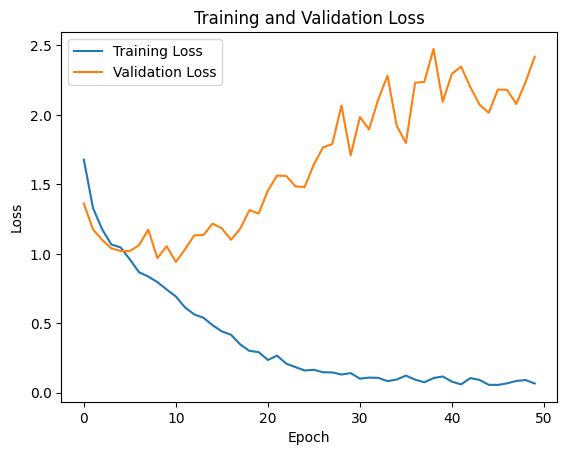

In [13]:
# 1. The graph showing the loss during training.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
# 2. The classification report
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)
class_labels = list(test_generator.class_indices.keys())
print(' A Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_labels))

16/16 [==============================] - 13s 671ms/step
 A Classification Report:
              precision    recall  f1-score   support

      donuts       0.50      0.48      0.49       100
 onion_rings       0.67      0.70      0.69       100
       pizza       0.89      0.56      0.69       100
spring_rolls       0.58      0.63      0.60       100
       steak       0.62      0.79      0.69       100

    accuracy                           0.63       500
   macro avg       0.65      0.63      0.63       500
weighted avg       0.65      0.63      0.63       500



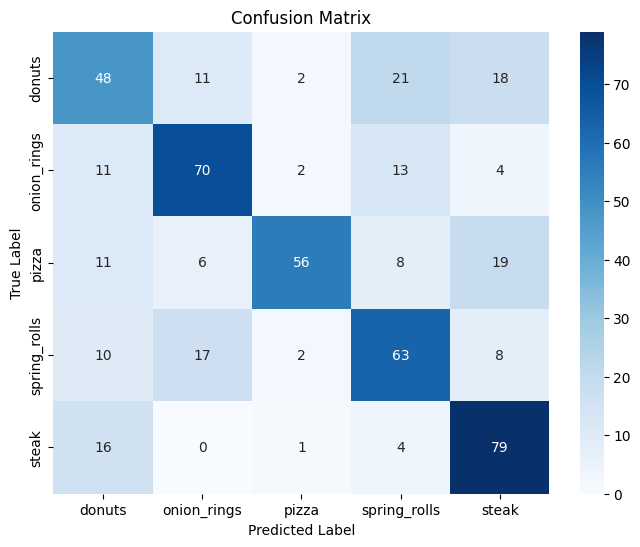

In [15]:
# 3. Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()